# Convolutional Neural Networks

## Libraries

In [1]:
# !pip install torch
# !pip install torchvision
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=7d5c3c7074e5e118747cf73386b354aeb189e9b9044d732291d8c02edef4ae43
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [36]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
import numpy as np
from tqdm import tqdm
from medmnist import DermaMNIST
from matplotlib import pyplot as plt
import seaborn as sns

## Data

[MedMNIST](https://medmnist.com/).

In [11]:
issubclass(DermaMNIST, torch.utils.data.Dataset)

True

In [12]:
# Datasets.
train_dataset = DermaMNIST(split='train',
                           transform=transforms.ToTensor(),
                           download=True,
                           size=224)
test_dataset = DermaMNIST(split='test',
                          transform=transforms.ToTensor(),
                          download=True,
                          size=224)

# Loaders.
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=64,
                                          shuffle=False)

100%|██████████| 1091112502/1091112502 [00:58<00:00, 18503517.86it/s]


Using downloaded and verified file: /root/.medmnist/dermamnist_224.npz


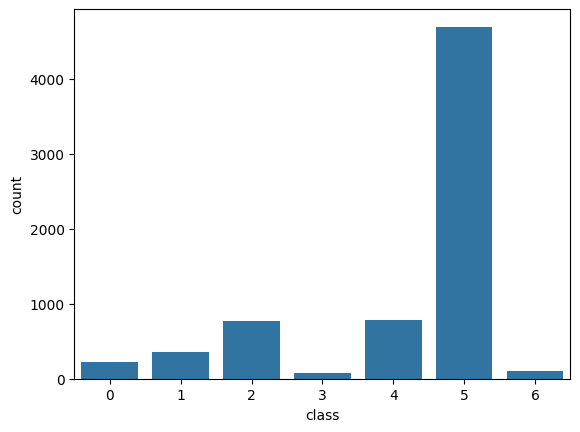

In [50]:
# Training set distribution.
sns.countplot(x=[label[0] for img, label in train_dataset])
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

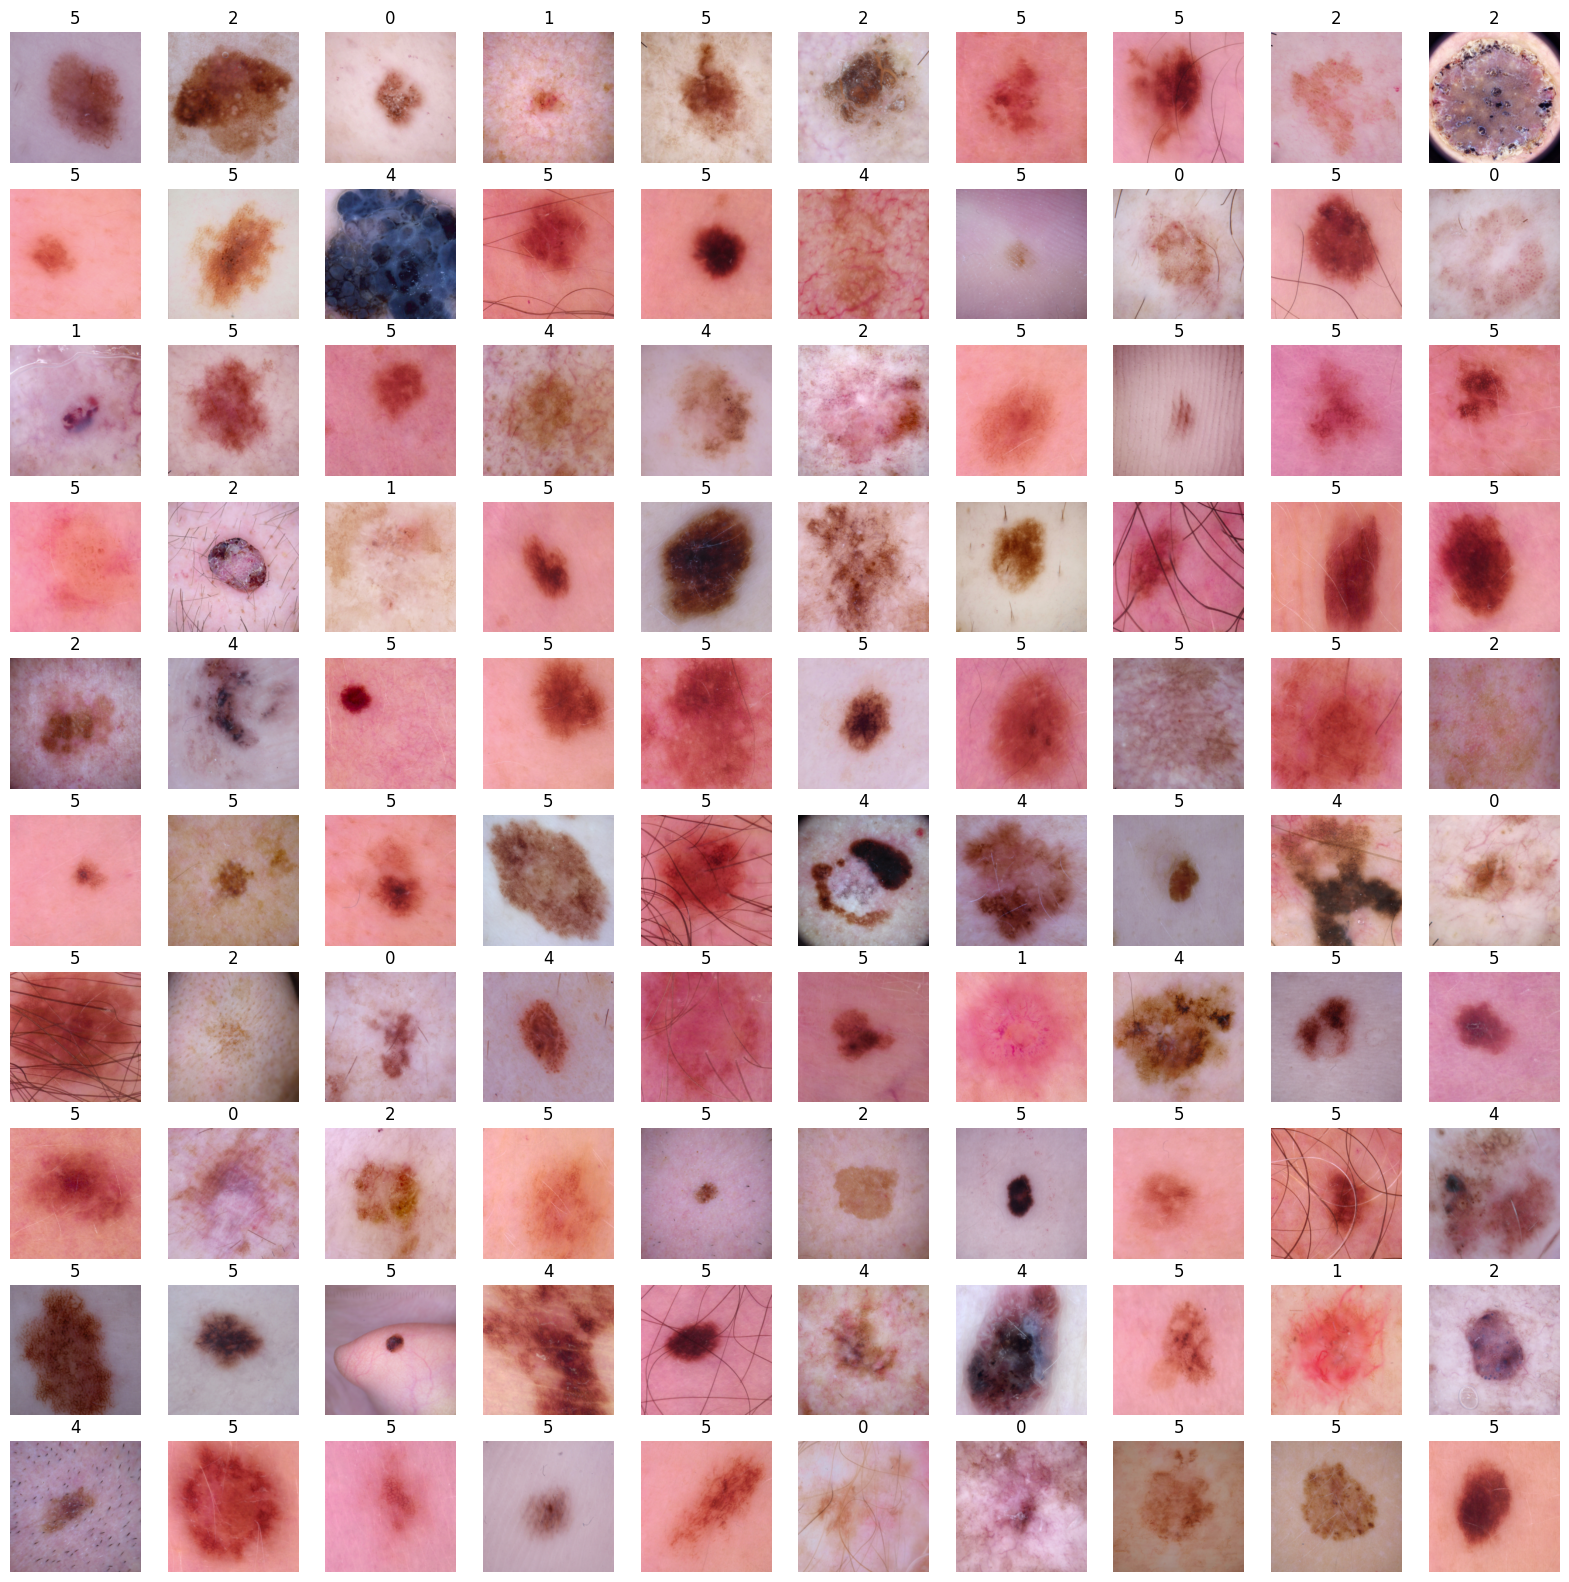

In [35]:
# From label index to label name.
labels_map = {
    0: 'actinic keratoses and intraepithelial carcinoma',
    1: 'basal cell carcinoma',
    2: 'benign keratosis-like lesions',
    3: 'dermatofibroma',
    4: 'melanoma',
    5: 'melanocytic nevi',
    6: 'vascular lesions'
}

# Plotting 100 training images.
figure = plt.figure(figsize=(20, 20))
rows, cols = 10, 10
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label[0])
    plt.axis('off')
    plt.imshow(img.T)
plt.show()